In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Coffee_Qlty.csv")

In [3]:
df.rename(columns = {'REC_ID':'rec_id', 'Species':'species', 'Continent.of.Origin':'continent_of_origin', 'Country.of.Origin' :'country_of_origin',
       'Harvest.Year':'harvest_year', 'Expiration':'expiration', 'Variety':'variety', 'Color':'color', 'Processing.Method':'processing_method',
       'Aroma':'aroma', 'Flavor':'flavor', 'Aftertaste':'aftertaste', 'Acidity':'acidity', 'Body':'body', 'Balance':'balance',
       'Uniformity':'uniformity', 'Clean.Cup':'clean_cup', 'Sweetness':'sweetness', 'Moisture':'moisture', 'Quakers':'quakers',
       'Category.One.Defects':'category_one_defects', 'Category.Two.Defects':'category_two_defects'},inplace = True)

In [4]:
df.columns

Index(['rec_id', 'species', 'continent_of_origin', 'country_of_origin',
       'harvest_year', 'expiration', 'variety', 'color', 'processing_method',
       'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
       'uniformity', 'clean_cup', 'sweetness', 'moisture', 'quakers',
       'category_one_defects', 'category_two_defects'],
      dtype='object')

In [5]:
df.isnull().sum()

rec_id                    0
species                   0
continent_of_origin       1
country_of_origin         1
harvest_year             60
expiration                0
variety                 226
color                   270
processing_method       170
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
moisture                  0
quakers                   0
category_one_defects      0
category_two_defects      0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.duplicated()

1       False
4       False
6       False
9       False
18      False
        ...  
1308    False
1309    False
1319    False
1322    False
1333    False
Length: 946, dtype: bool

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
expiry_year = []
for i in df['expiration']:

  if int(i[1]) < 7:
    i = int('20'+ i[len(i)-2] + i[len(i)-1])
  elif int(i[0]) == 1 or int(i[1]) > 6 :
    i = int('20'+ i[len(i)-2] + i[len(i)-1])
  expiry_year.append(i)

In [10]:
df['expiry_year'] = expiry_year

In [11]:
df['expiry_duration'] = df['expiry_year']-df['harvest_year']


In [12]:
arabica_df = df[df['species']=='Arabica']

In [13]:
robusta_df = df[df['species']=='Robusta']
robusta_df

,rec_id,species,continent_of_origin,country_of_origin,harvest_year,expiration,variety,color,processing_method,aroma,...,balance,uniformity,clean_cup,sweetness,moisture,quakers,category_one_defects,category_two_defects,expiry_year,expiry_duration
1319,1319,Robusta,Asia,India,2015.0,08/17/17,Other,Green,Washed / Wet,7.67,...,8.00,10.00,10.0,7.92,0.09,0,0,0,2017,2.0
1322,1322,Robusta,Asia,India,2015.0,08/23/17,Other,Green,Natural / Dry,7.67,...,7.58,10.00,10.0,7.75,0.11,0,0,0,2017,2.0
1333,1333,Robusta,North America,United States,2012.0,02/28/13,Arusha,Green,Natural / Dry,7.92,...,7.42,9.33,10.0,7.58,0.00,0,0,0,2013,1.0


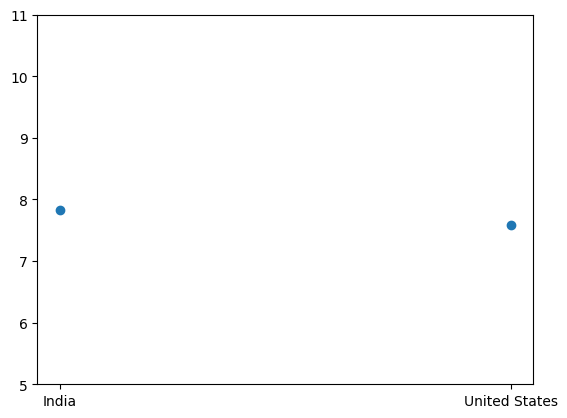

In [15]:
plt.scatter(robusta_df['country_of_origin'].unique(),robusta_df.groupby(['country_of_origin']).mean(numeric_only=True)['sweetness'])
ax = plt.gca()
ax.set_ylim([5, 11])
plt.show()

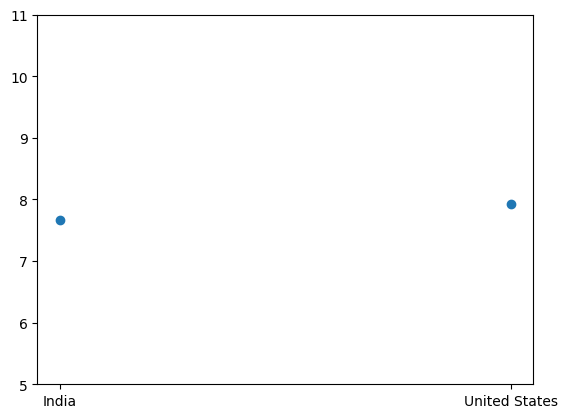

In [16]:
plt.scatter(robusta_df['country_of_origin'].unique(),robusta_df.groupby(['country_of_origin']).mean(numeric_only=True)['aroma'])
ax = plt.gca()
ax.set_ylim([5, 11])
plt.show()

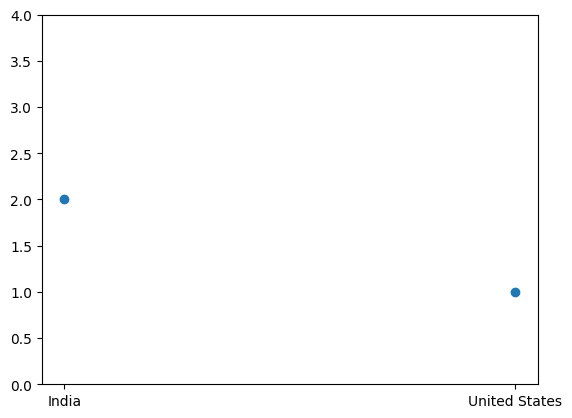

In [17]:
plt.scatter(robusta_df['country_of_origin'].unique(),robusta_df.groupby(['country_of_origin']).mean(numeric_only=True)['expiry_duration'])
ax = plt.gca()
ax.set_ylim([0, 4])
plt.show()

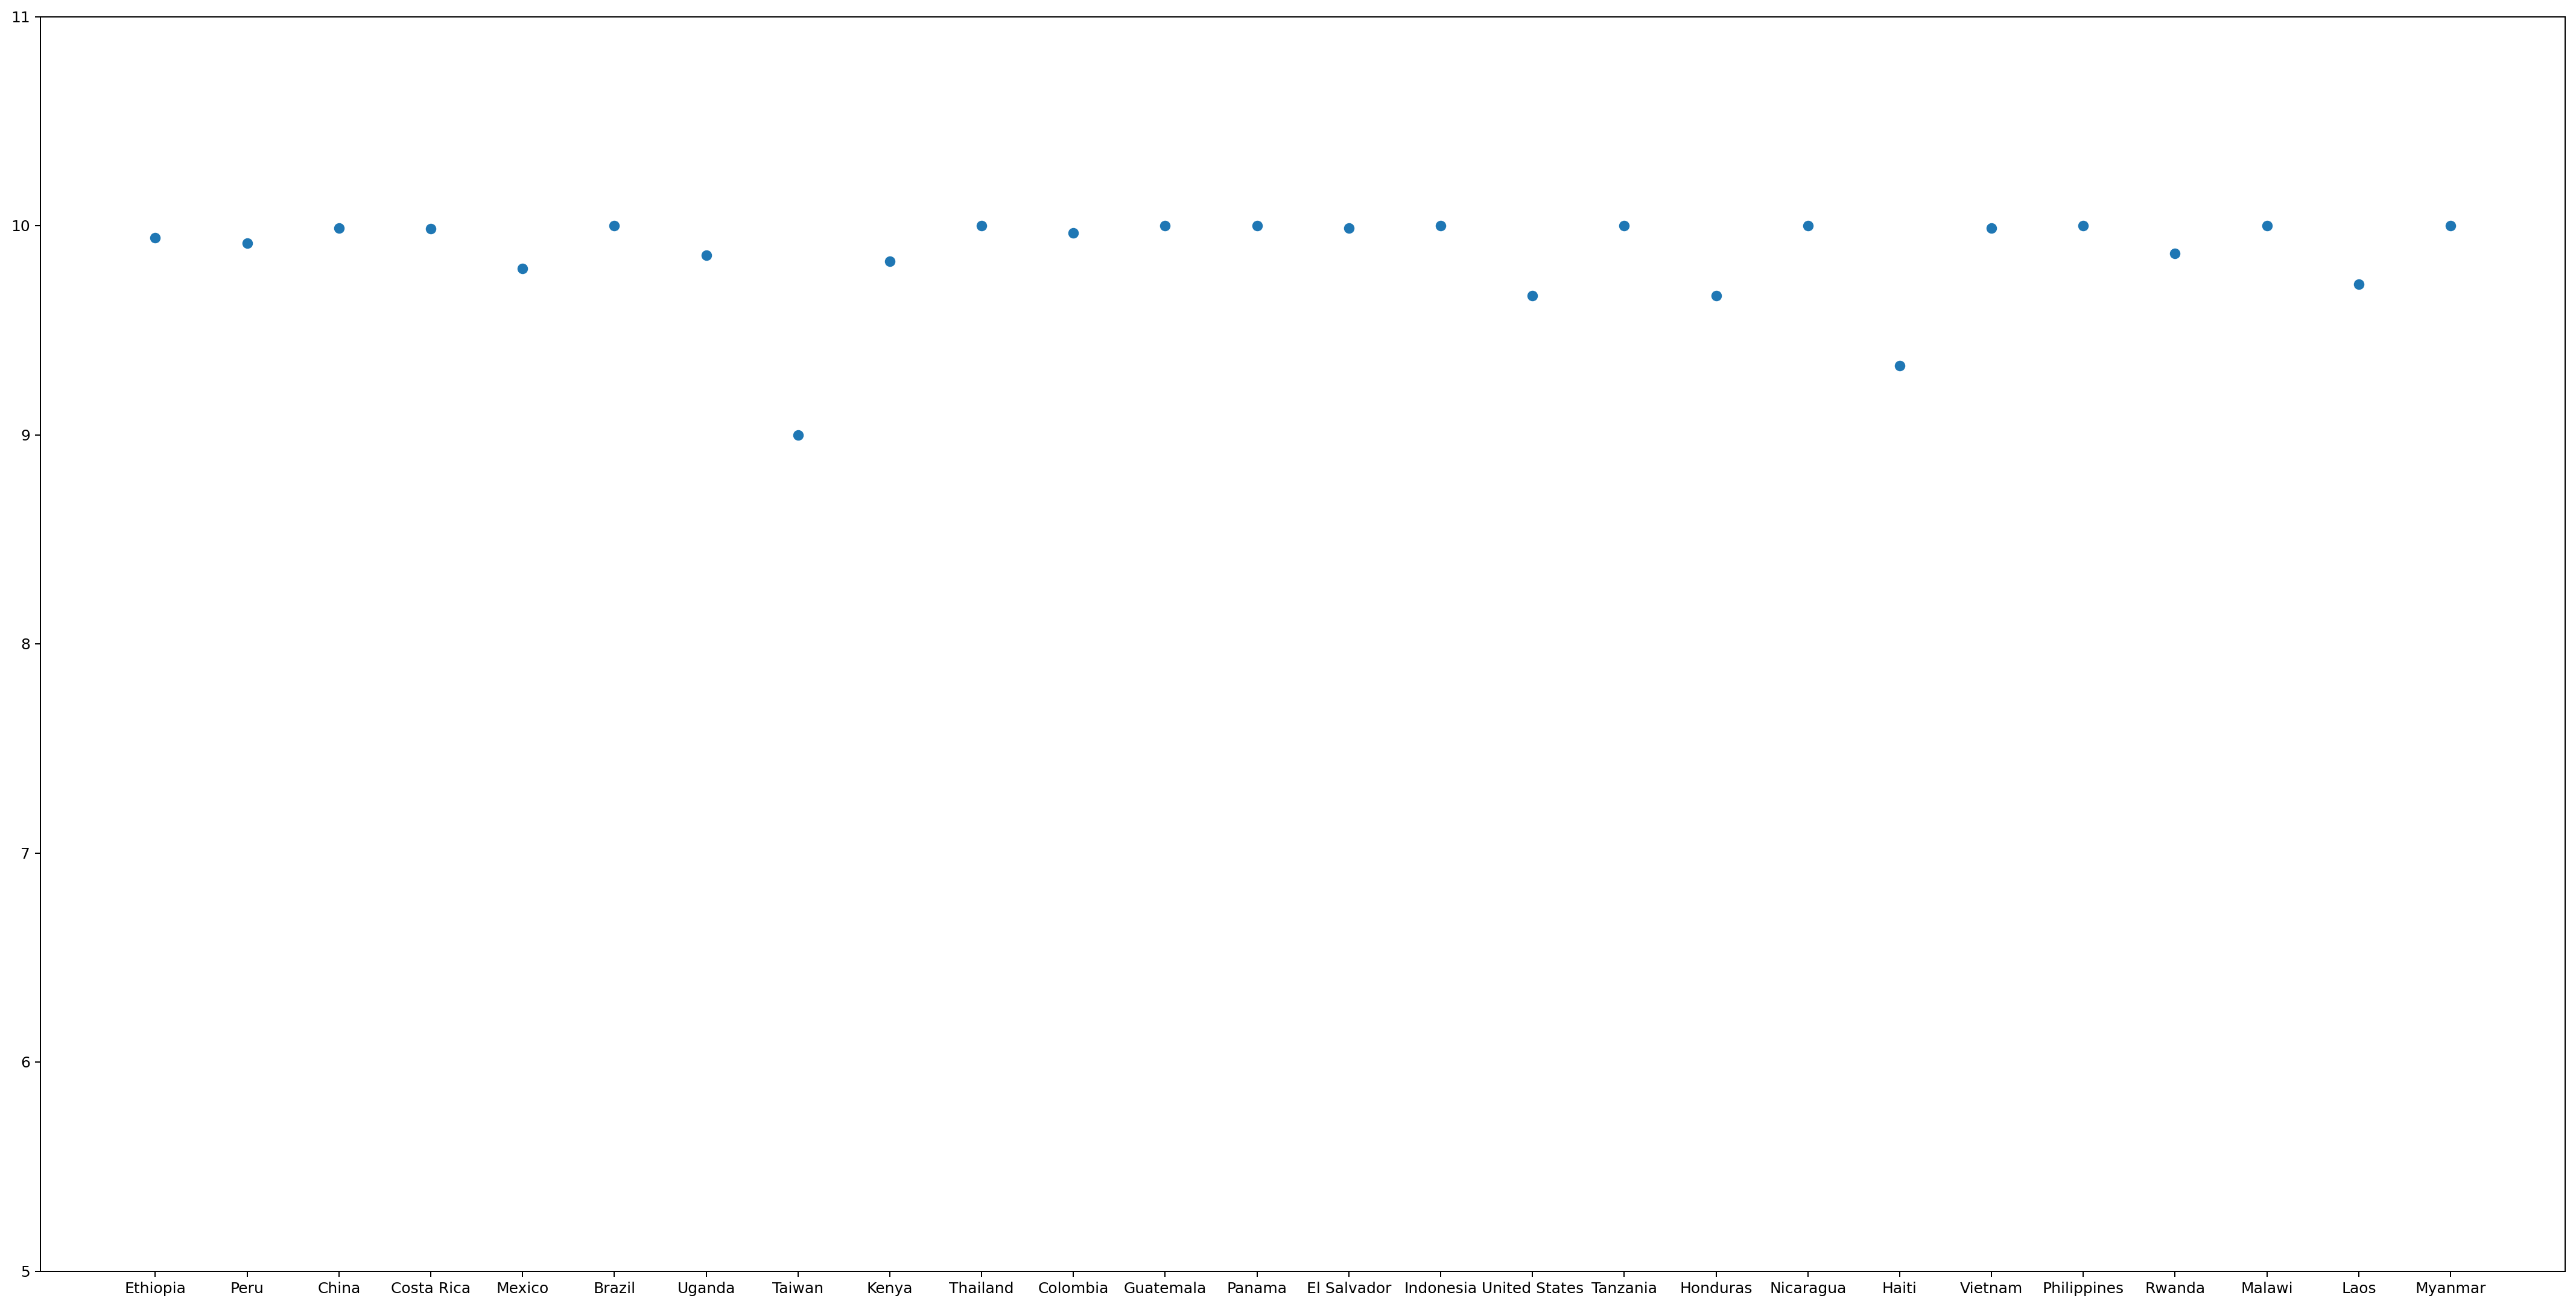

In [18]:
plt.figure(figsize=(30, 15), dpi=180)
plt.scatter(arabica_df['country_of_origin'].unique(), arabica_df.groupby(['country_of_origin']).mean(numeric_only=True)['sweetness'])
ax = plt.gca()
ax.set_ylim([5, 11])
plt.show()

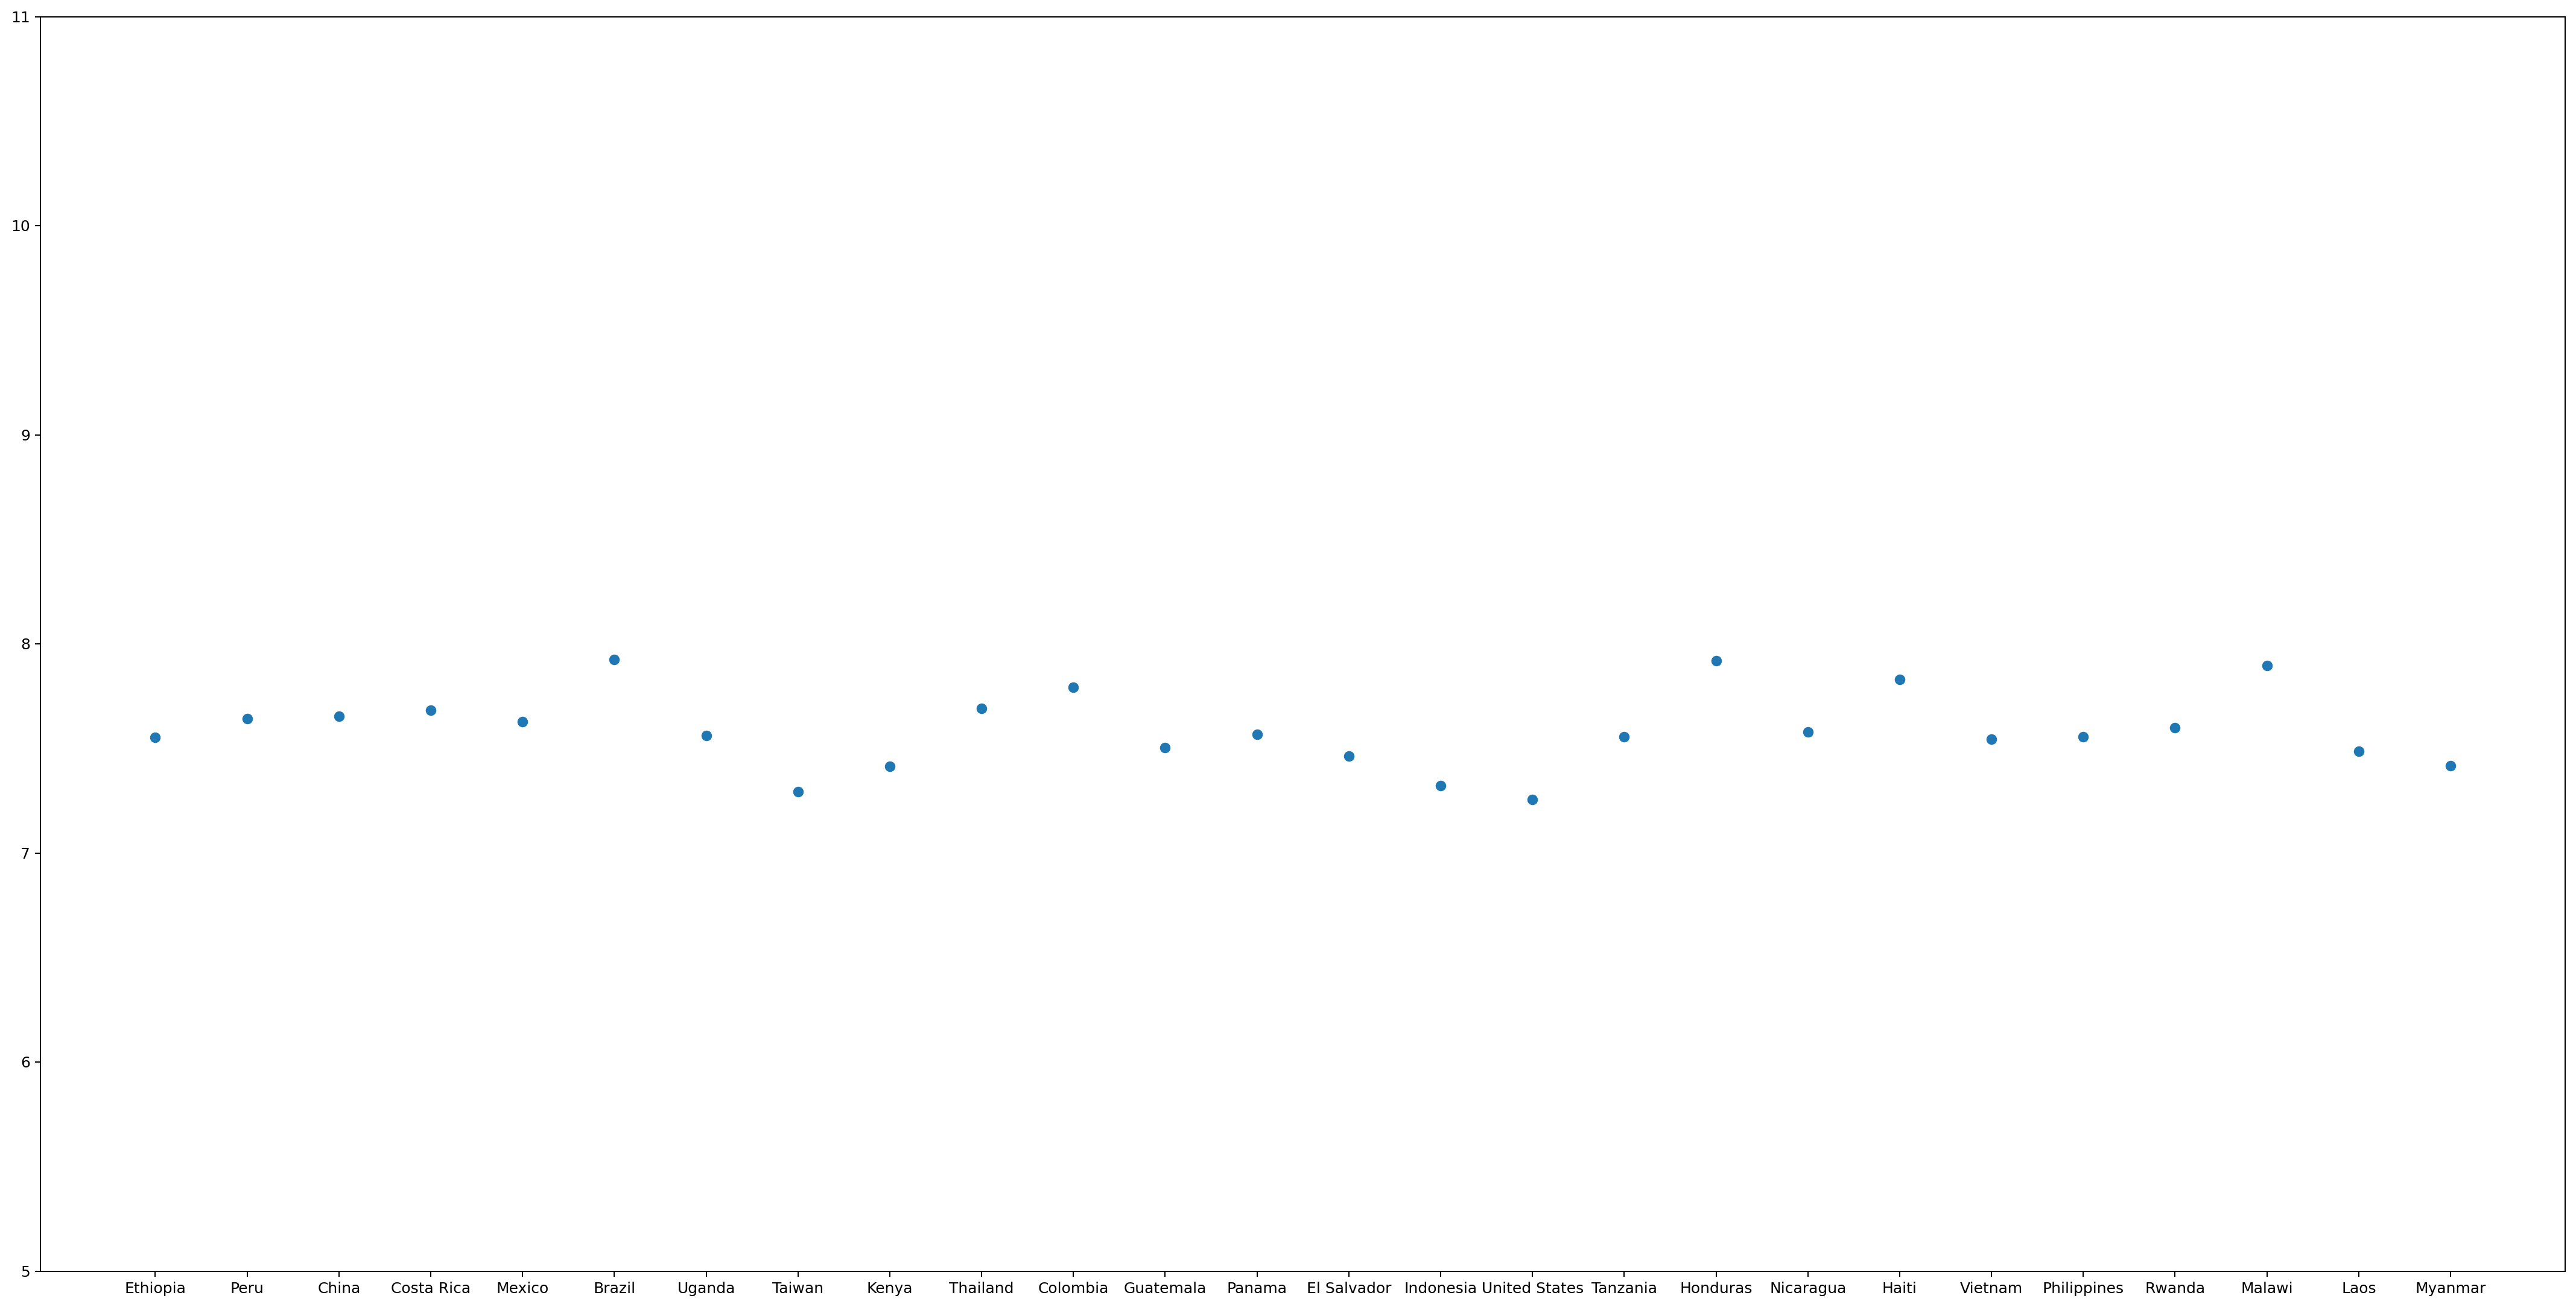

In [21]:

plt.figure(figsize=(30, 15), dpi=180)
plt.scatter(arabica_df['country_of_origin'].unique(), arabica_df.groupby(['country_of_origin']).mean(numeric_only=True)['aroma'])
ax = plt.gca()
ax.set_ylim([5, 11])
plt.show()

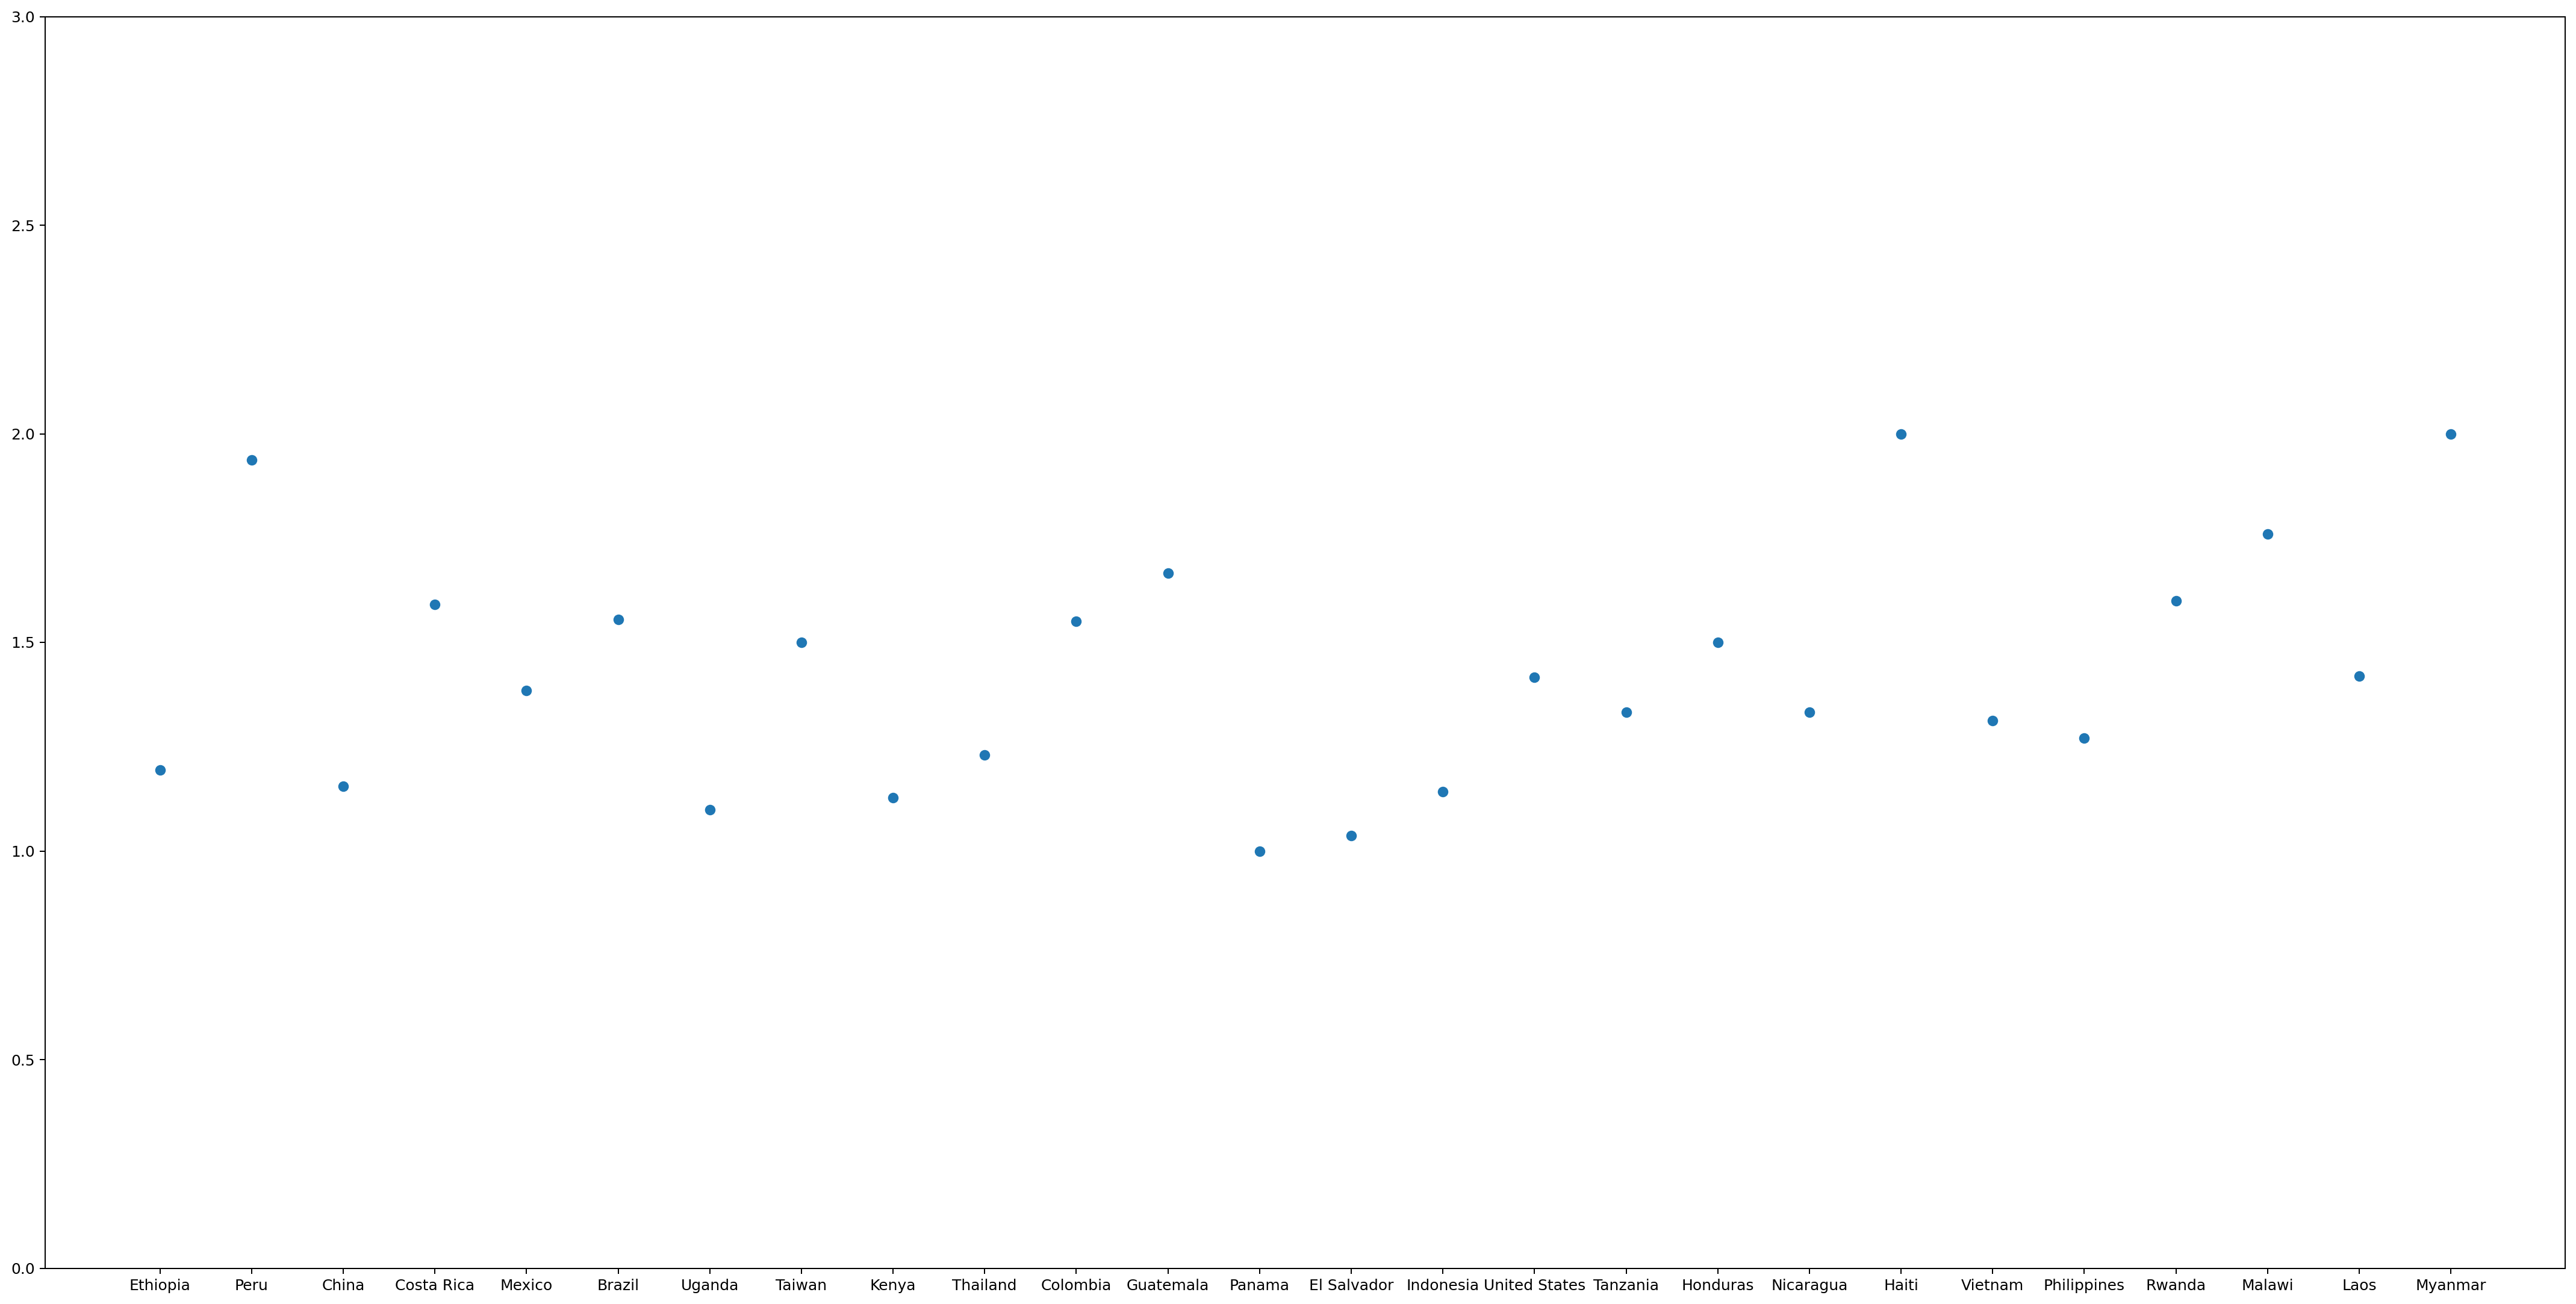

In [24]:
plt.figure(figsize=(30, 15), dpi=180)
plt.scatter(arabica_df['country_of_origin'].unique(), arabica_df.groupby(['country_of_origin']).mean(numeric_only=True)['expiry_duration'])
ax = plt.gca()
ax.set_ylim([0,3])
plt.show()